In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn import metrics   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [2]:
data=pd.read_csv("data/listings.csv")
df=pd.DataFrame(data)

popularity = [0 for i in df['id']]

for i in range(len(popularity)):
    popularity[i] = (1 - (df['availability_365'][i]/365))

df['popularity'] = popularity
clean_data=df.drop(data.columns[[1,2,3,7,9,10,12,13,18,19,20,23,26,27,31,32,39,40,41,42,43,44,45,46,47,48,49,50,51,64]],axis = 1)
clean_data.iloc[:,:3]
df["price"]=df["price"].str.replace("$","")
df["price"]=pd.to_numeric(df["price"],errors='coerce')


In [3]:
## FUNCTION FOR POPULARITY CLASSIFICATION BASED ON THE RANKING
def popularity(row):
    if row["popularity"]<=0.20:
        return "Very Unpopular"
    if row["popularity"]>0.20 and row["popularity"] <=0.40:
        return "Unpopular"
    if row["popularity"]>0.40 and row["popularity"]<=0.60 :
        return "Moderately Popular"
    if row["popularity"]>0.60 and row["popularity"]<=0.80:
        return "Popular"
    if row["popularity"]>0.80:
        return "Very Popular"
   

In [4]:
clean_data["Popularity"]=clean_data.apply(popularity,axis=1)
clean_data.iloc[:,44:]

,popularity,Popularity
0,0.136986,Very Unpopular
1,0.109589,Very Unpopular
2,0.479452,Moderately Popular
3,0.172603,Very Unpopular
4,0.320548,Unpopular
...,...,...
18521,0.739726,Popular
18522,0.293151,Unpopular
18523,1.000000,Very Popular
18524,0.326027,Unpopular


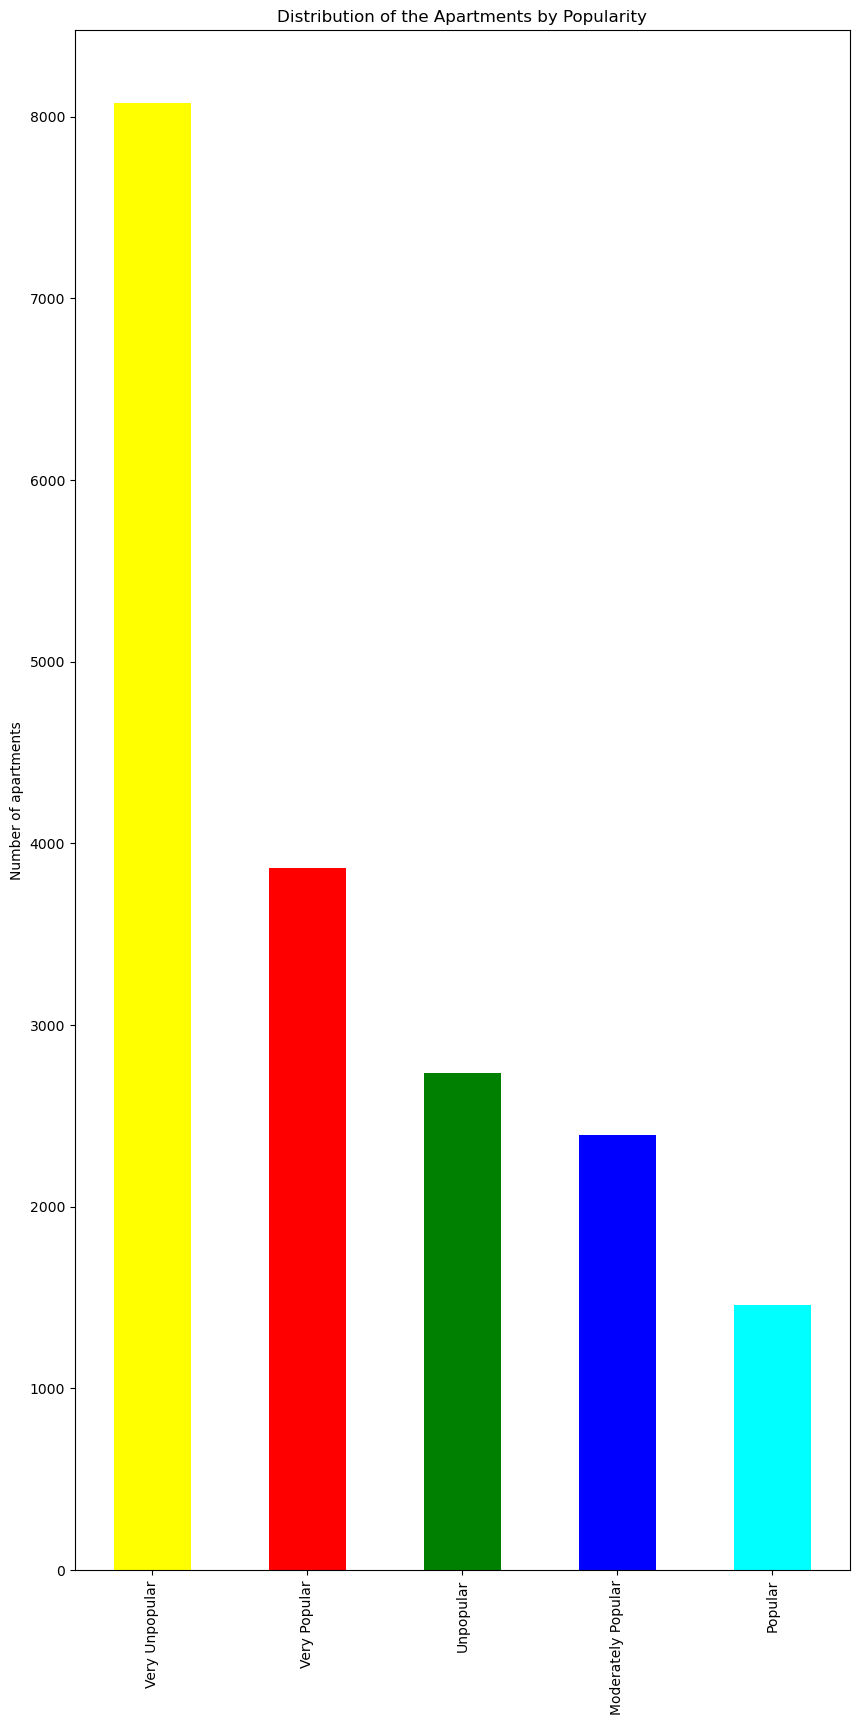

In [5]:
plt.rcdefaults()
plt.rcParams["figure.figsize"] = (10,20)
clean_data["Popularity"].value_counts().plot(kind="bar",color=['yellow', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("Number of apartments")
plt.title("Distribution of the Apartments by Popularity")
plt.show()

# ADABOOST 


In [6]:
### ADABOOST IMPLEMENTATION
classification=clean_data[['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_location', 'review_scores_value', 'popularity',
       'Popularity']]
classification=classification.dropna()
X=classification[['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_location', 'review_scores_value', 'popularity']]
y=classification["Popularity"]

In [34]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [44]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
# Different base estimator classifier
from sklearn.svm import SVC
ada_naive=AdaBoostClassifier(NaiveBayesClassifier())
ada_deci = AdaBoostClassifier(DecisionTreeClassifier())
ada_extra=AdaBoostClassifier(ExtraTreeClassifier())

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=500,learning_rate=1, random_state=0)
aaa=AdaBoostClassifier(n_estimators=500,base_estimator=svc,learning_rate=1, random_state=0)
xxx=AdaBoostClassifier(n_estimators=500,base_estimator=ada_deci,learning_rate=1,random_state=0)
www=AdaBoostClassifier(n_estimators=500,base_estimator=ada_extra,learning_rate=1,random_state=0)
# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)
model2=aaa.fit(X_train,y_train)
model3=xxx.fit(X_train,y_train)
model4=www.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)
y_pred4=model4.predict(X_test)

NameError: name 'NaiveBayesClassifier' is not defined

In [38]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test, y_pred)*100
acc2=accuracy_score(y_test, y_pred2)*100
acc3=accuracy_score(y_test,y_pred3)*100
acc4=accuracy_score(y_test,y_pred4)*100
data = {'Classifier': ["Base","svc","Rand Forest","Extra Tree"], 'Accuracy': [acc1,acc2,acc3,acc4]}
accuracy=pd.DataFrame(data=data)
accuracy



,Classifier,Accuracy
0,Base,79.472693
1,Log_reg,31.575643
2,Rand Forest,100.000000
3,Extra Tree,85.655995


# Pipelines

In [39]:
## KNN Classification Pipeline
KNN_pipeline=Pipeline([('scaler', StandardScaler()), 
                       ('KNN', KNeighborsClassifier(n_neighbors=3))])
